
Assignment for Week 5<br>
Submitted by: Chris Panican<br>
Intro to Machine Learning CSc 55929<br>
Prof. Erik Grimmelmann<br>


Week 5 assignment:<br>
1. Using the Iris dataset, use all three classes at once.<br>
2. Using the Scikit-Learn Library train the Logistic Regression model using the following:
  * All six cases of using two features at a time.
  * All four cases of using three features at a time.
  * The one case of using all features at once.
3. Summarize your results (i.e, what’ s the best accuracy you can obtain for each of the 11 cases you considered, how many iterations does it take to converge, anything else you think is relevant and important) in a table.
4. Play with both L1 and L2 regularization and vary the regularization parameter C.
5. Discuss your findings. Does using more dimensions help when trying to classify the data in this dataset? How important is regularization in these cases?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()
y = iris.target

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')

In [3]:
# Tuple of data. (Case, Features, Penalty, C-Value, Iterations, Accuracy)
results=[]

In [4]:
# Helper function
# Plot all various regularization and C values for each case.
# If there are two features, then plot parameter can be set to true.
# Each case will also append data accuracy and iterations data into result.
def logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, features, case, plot=None):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    
    # Plot case where C_val=100 and Penalty L2
    C_val = 100.0
    lr = LogisticRegression(C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L2 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L2', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=100 and Penalty L1
    C_val = 1.0
    lr = LogisticRegression(penalty='l2', C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L2 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L2', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=1.0 and Penalty L2
    C_val = 100.0
    lr = LogisticRegression(penalty='l1', C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L1 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L1', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=1.0 and Penalty L1
    C_val = 1.0
    lr = LogisticRegression(penalty='l1', C=1.0, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L1 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L1', '1.0', lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    return

## 2. Train Adaline model using the following:
### 2.1: All six cases of using two features at a time.
2.1.1: sepal length & sepal width <br/>
2.1.2: sepal length & petal length <br/>
2.1.3: sepal length & petal width <br/>
2.1.4: sepal width & petal length <br/>
2.1.5: sepal width & petal width <br/>
2.1.6: petal length & petal width <br/>

### 2.1.1: sepal length & sepal width

In [5]:
X = iris.data[:, [0, 1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


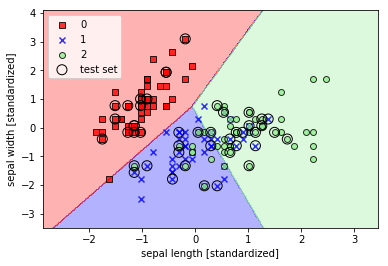

Accuracy: 0.76
Iterations: 9 

Regularization L2 and C=1.0:


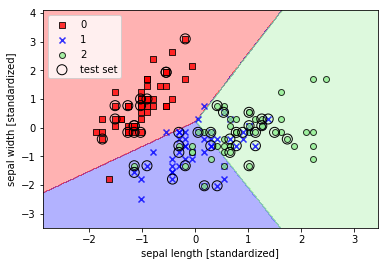

Accuracy: 0.76
Iterations: 6 

Regularization L1 and C=100.0:


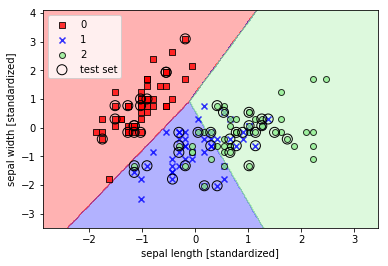

Accuracy: 0.76
Iterations: 26 

Regularization L1 and C=1.0:


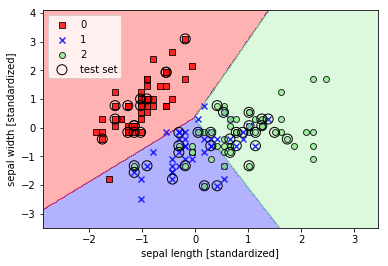

Accuracy: 0.76
Iterations: 12 



In [6]:
x_label = 'sepal length [standardized]'
y_label = 'sepal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 1, plot=True)

### 2.1.2: sepal length & petal length

In [7]:
X = iris.data[:, [0, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


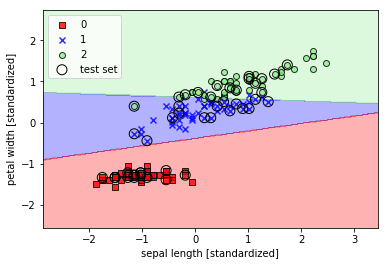

Accuracy: 0.96
Iterations: 9 

Regularization L2 and C=1.0:


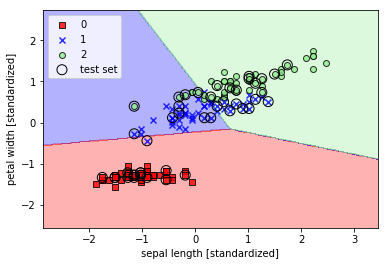

Accuracy: 0.71
Iterations: 5 

Regularization L1 and C=100.0:


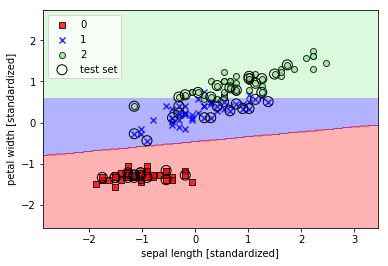

Accuracy: 0.98
Iterations: 34 

Regularization L1 and C=1.0:


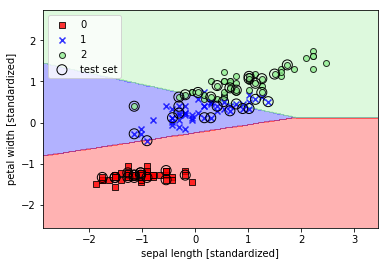

Accuracy: 0.82
Iterations: 19 



In [8]:
x_label = 'sepal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 2, plot=True)

### 2.1.3: sepal length & petal width

In [9]:
X = iris.data[:, [0, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


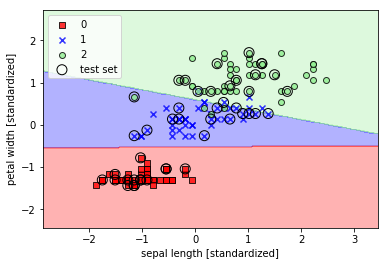

Accuracy: 0.96
Iterations: 8 

Regularization L2 and C=1.0:


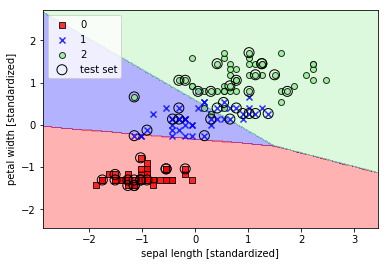

Accuracy: 0.78
Iterations: 5 

Regularization L1 and C=100.0:


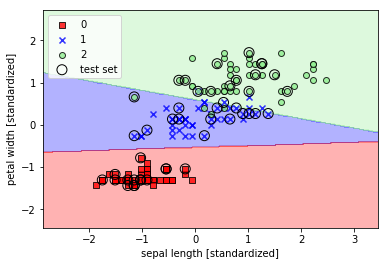

Accuracy: 0.96
Iterations: 19 

Regularization L1 and C=1.0:


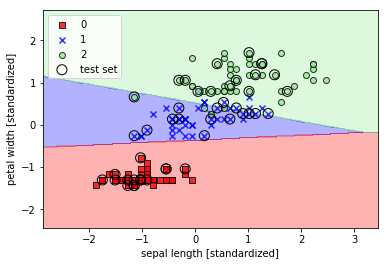

Accuracy: 0.91
Iterations: 17 



In [10]:
x_label = 'sepal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 3, plot=True)

### 2.1.4: sepal width & petal length

In [11]:
X = iris.data[:, [1, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


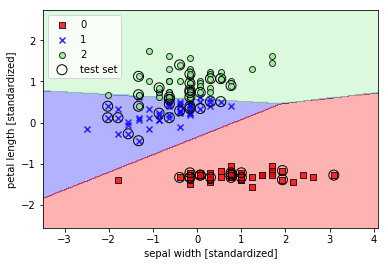

Accuracy: 0.98
Iterations: 8 

Regularization L2 and C=1.0:


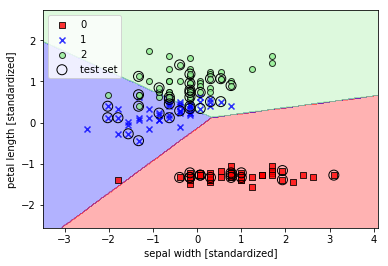

Accuracy: 0.87
Iterations: 6 

Regularization L1 and C=100.0:


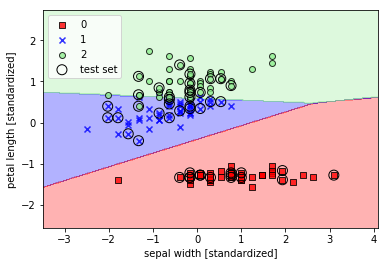

Accuracy: 0.98
Iterations: 32 

Regularization L1 and C=1.0:


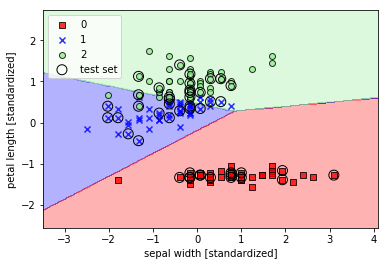

Accuracy: 0.91
Iterations: 19 



In [12]:
x_label = 'sepal width [standardized]'
y_label = 'petal length [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 4, plot=True)

### 2.1.5: sepal width & petal width

In [13]:
X = iris.data[:, [1, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


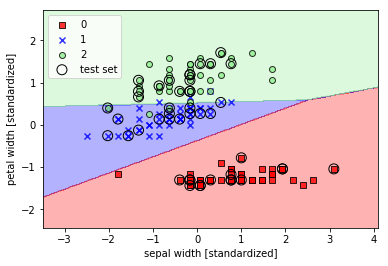

Accuracy: 1.00
Iterations: 8 

Regularization L2 and C=1.0:


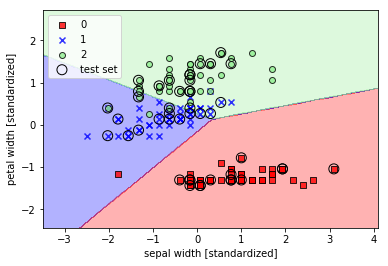

Accuracy: 0.87
Iterations: 6 

Regularization L1 and C=100.0:


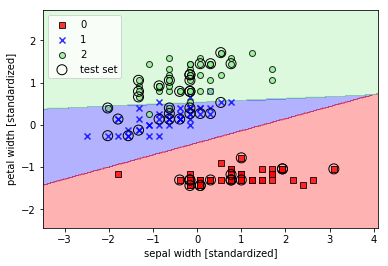

Accuracy: 1.00
Iterations: 25 

Regularization L1 and C=1.0:


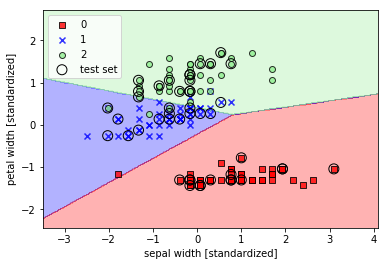

Accuracy: 0.96
Iterations: 19 



In [14]:
x_label = 'sepal width [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 5, plot=True)

### 2.1.6: petal length & petal width

In [15]:
X = iris.data[:, [2, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


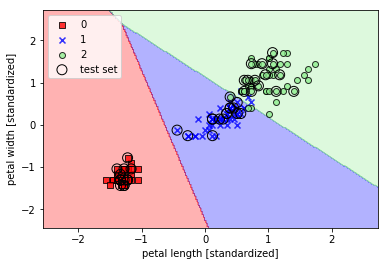

Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:


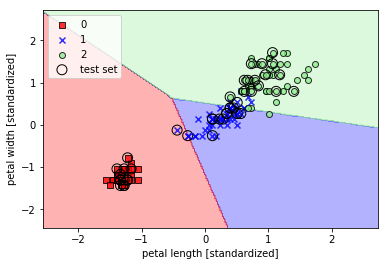

Accuracy: 0.93
Iterations: 6 

Regularization L1 and C=100.0:


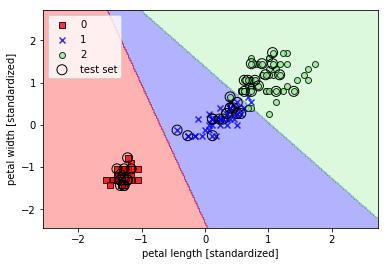

Accuracy: 0.98
Iterations: 39 

Regularization L1 and C=1.0:


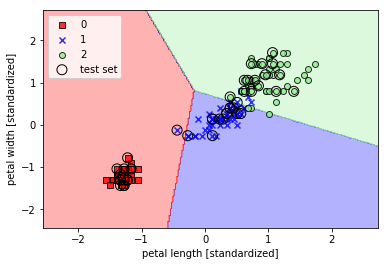

Accuracy: 0.96
Iterations: 21 



In [16]:
x_label = 'petal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 6, plot=True)

### 2.2: All four cases of using three features at a time.
2.2.1: sepal length, sepal width, and petal length <br/>
2.2.2: sepal length, sepal width, and petal width <br/>
2.2.3: sepal length, petal length, and petal width <br/>
2.2.4: sepal width, petal length, and petal width <br/>

### 2.2.1: sepal length, sepal width, and petal length

In [17]:
X = iris.data[:, [0,1,2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [18]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 7)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.78
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 37 

Regularization L1 and C=1.0:
Accuracy: 0.91
Iterations: 20 



### 2.2.2: sepal length, sepal width, and petal width

In [19]:
X = iris.data[:, [0,1,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [20]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 8)

Regularization L2 and C=100.0:
Accuracy: 0.96
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.84
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.96
Iterations: 24 

Regularization L1 and C=1.0:
Accuracy: 0.93
Iterations: 16 



### 2.2.3: sepal length, petal length, and petal width

In [21]:
X = iris.data[:, [0,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [22]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 9)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.80
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 33 

Regularization L1 and C=1.0:
Accuracy: 0.89
Iterations: 23 



### 2.2.4: sepal width, petal length, and petal width

In [23]:
X = iris.data[:, [1,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [24]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 10)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.91
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 32 

Regularization L1 and C=1.0:
Accuracy: 0.96
Iterations: 18 



## The one case of using all features at once

In [25]:
X = iris.data[:, [0,1,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 4, 11)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.84
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 31 

Regularization L1 and C=1.0:
Accuracy: 0.96
Iterations: 17 



# Summary of findings

In [27]:
print("Case | Features | Penalty | C-Value | Iteration | Accuracy")

for case, features, penalty, c_val, iteration, acc in results:
    print(" {:<9} {:<8} {:<8} {:<12} {:<8} {}".format(case, features, penalty, c_val, iteration, acc))

Case | Features | Penalty | C-Value | Iteration | Accuracy
 1         2        L2       100.0        9        0.76
 1         2        L2       1.0          6        0.76
 1         2        L1       100.0        26       0.76
 1         2        L1       1.0          12       0.76
 2         2        L2       100.0        9        0.96
 2         2        L2       1.0          5        0.71
 2         2        L1       100.0        34       0.98
 2         2        L1       1.0          19       0.82
 3         2        L2       100.0        8        0.96
 3         2        L2       1.0          5        0.78
 3         2        L1       100.0        19       0.96
 3         2        L1       1.0          17       0.91
 4         2        L2       100.0        8        0.98
 4         2        L2       1.0          6        0.87
 4         2        L1       100.0        32       0.98
 4         2        L1       1.0          19       0.91
 5         2        L2       100.0        8  

### Table summary with C-Value of 100 and L2 Penalty

| **Cases** |**Features**| **Iterations** | **Accuracy** | 
|-----------|------------|----------------|--------------|
|     1     |     2      |        9       |     0.76     |
|     2     |     2      |        9       |     0.96     |
|     3     |     2      |        8       |     0.96     |
|     4     |     2      |        8       |     0.98     |
|     5     |     2      |        8       |     1.00     |
|     6     |     2      |        9       |     0.98     |
|     7     |     3      |        9       |     0.96     |
|     8     |     3      |        9       |     0.96     |
|     9     |     3      |        9       |     0.98     |
|     10    |     3      |        9       |     0.98     |
|     11    |     4      |        9       |     0.98     |


# Discussion of findings

For this assignment, we were told to use all values of Iris dataset all at once. After using Logistic Regression, we found that the difference between accuracy amongst features is not very huge. However, the precision between the features are different. For instance, cases with 2 features have accuracy ranging from 0.71 - 1.00. Cases with 3 features have accuracy ranging from 0.78 - 0.98. And lastly, cases with 4 features have accuracy ranging from 0.84 - 0.98. So, it was found that more dimensions yielded more stable results since the differences between accuracies decrease for every dimension.<br>

In addition, by comparing different regularizations from each data, it can also be seen that using more iterations yielded better accuracy. For example, on the last case of `penalty='l2'`, 9 iteration gave us an accuracy of 0.98, while 6 iteration gave us an accuracy of 0.84. For the case of `penalty='l1'`, 31 iterations gave an accuracy of 0.98, and 17 iterations gave an accuracy of 0.96. It is also important to note that L2 had less iterations than L1 to produce an accurate result.